# future

최규빈  
2025-01-01

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/future.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-z7s7FppJtYXFUnJzw88qWg&si=3TuaJ7IiiIG6QT7X>}}

# 2. Imports

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. OXFORD-IIIT-PET

In [4]:
train_dataset = torchvision.datasets.OxfordIIITPet(
    root='./data', 
    split='trainval',
    download=True,
    target_types='binary-category',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize((512,512)),
        torchvision.transforms.ToTensor(),
    ])
)
test_dataset = torchvision.datasets.OxfordIIITPet(
    root='./data', 
    split='test',
    download=True,
    target_types='binary-category',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize((512,512)),
        torchvision.transforms.ToTensor(),
    ])
)
torch.manual_seed(43052)
X,y = next(iter(torch.utils.data.DataLoader(train_dataset,batch_size=3680,shuffle=True)))
XX,yy = next(iter(torch.utils.data.DataLoader(test_dataset,batch_size=3669,shuffle=True)))
y = y.reshape(-1,1).float()
yy = yy.reshape(-1,1).float()

In [8]:
ds_train = torch.utils.data.TensorDataset(X,y)
dl_train = torch.utils.data.DataLoader(ds_train,batch_size=64,shuffle=True)
ds_test = torch.utils.data.TensorDataset(XX,yy)
dl_test = torch.utils.data.DataLoader(ds_test,batch_size=64,shuffle=True)

In [249]:
net = torchvision.models.resnet18(pretrained=True)
net.fc = torch.nn.Linear(512,1)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(3):
    net.to("cuda:0")
    s = 0 
    for Xm,ym in dl_train:
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        #1
        netout = net(Xm)
        #2
        loss = loss_fn(netout,ym) 
        #3
        loss.backward()
        #4 
        optimizr.step()
        optimizr.zero_grad()
        s = s + ((net(Xm) > 0.5) == ym).sum().item()
    #---# 
    acc = s/len(X)
    print(f"train_accuracy = {acc:.4f}")

train_accuracy = 0.9826
train_accuracy = 0.9932
train_accuracy = 0.9976

In [250]:
# net.to("cpu")
# net(XX)
# 이러면 될것같은데.. 많이 느릴거에요.. (컴터뻗을수도?)

In [251]:
s = 0 
for Xm,ym in dl_test:
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")
    s = s + ((net(Xm) > 0.5) == ym).sum().item()
acc = s/len(X)

In [252]:
acc

# 4. Feature Visualization

In [253]:
net2d = torch.nn.Sequential(
    torch.nn.Sequential(
        net.conv1,
        net.bn1,
        net.maxpool,
    ),
    net.layer1,
    net.layer2,
    net.layer3,
    net.layer4
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0349538..6.156901].

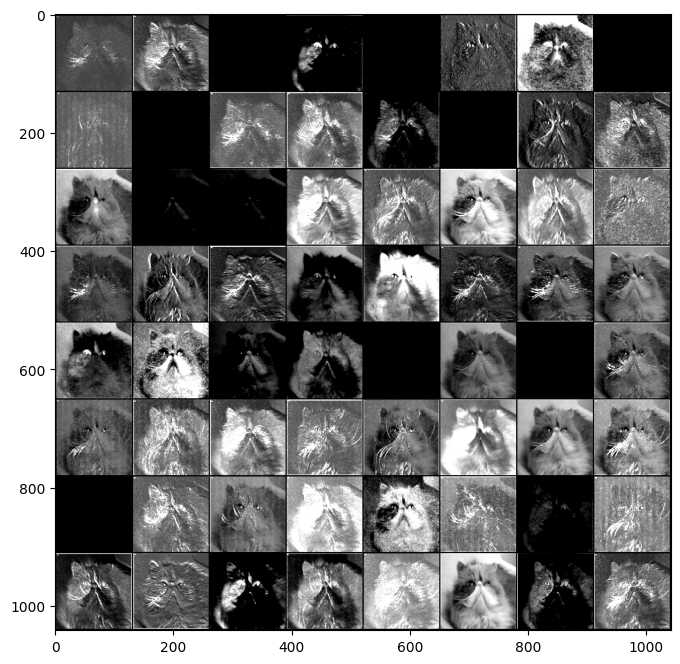

In [255]:
out = net2d[:1](X[[2]].to("cuda:0")).cpu().detach()
fig = plt.figure(figsize=(8, 8))
img_grid = torchvision.utils.make_grid(torch.einsum('ochw -> cohw', out), nrow=8)
plt.imshow(img_grid.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..7.703248].

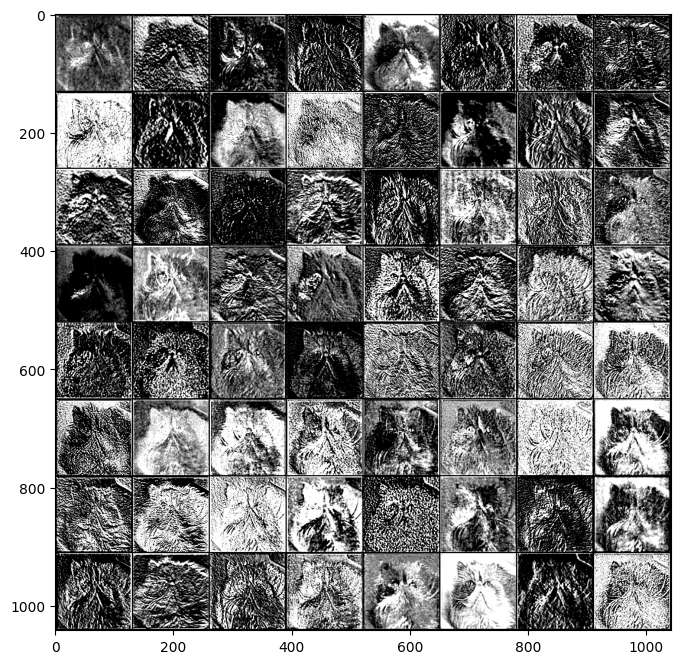

In [256]:
out = net2d[:2](X[[2]].to("cuda:0")).cpu().detach()
fig = plt.figure(figsize=(8, 8))
img_grid = torchvision.utils.make_grid(torch.einsum('ochw -> cohw', out), nrow=8)
plt.imshow(img_grid.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..7.682226].

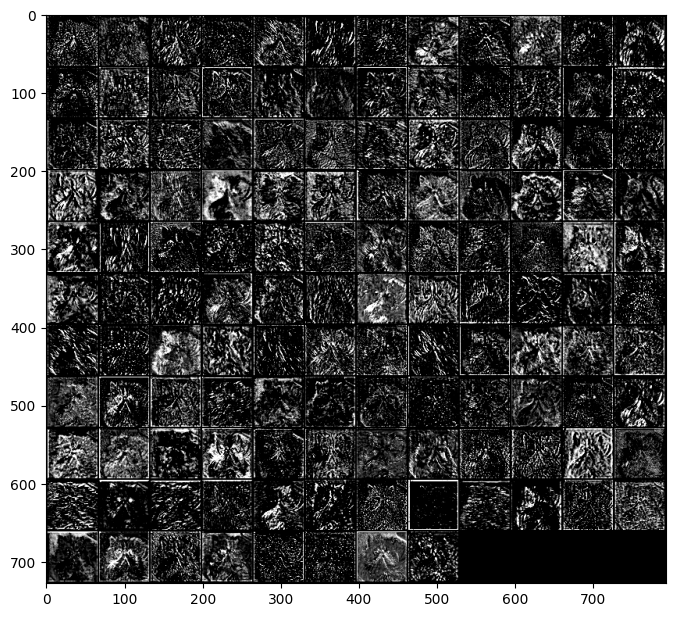

In [257]:
out = net2d[:3](X[[2]].to("cuda:0")).cpu().detach()
fig = plt.figure(figsize=(8, 8))
img_grid = torchvision.utils.make_grid(torch.einsum('ochw -> cohw', out), nrow=12)
plt.imshow(img_grid.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..7.171454].

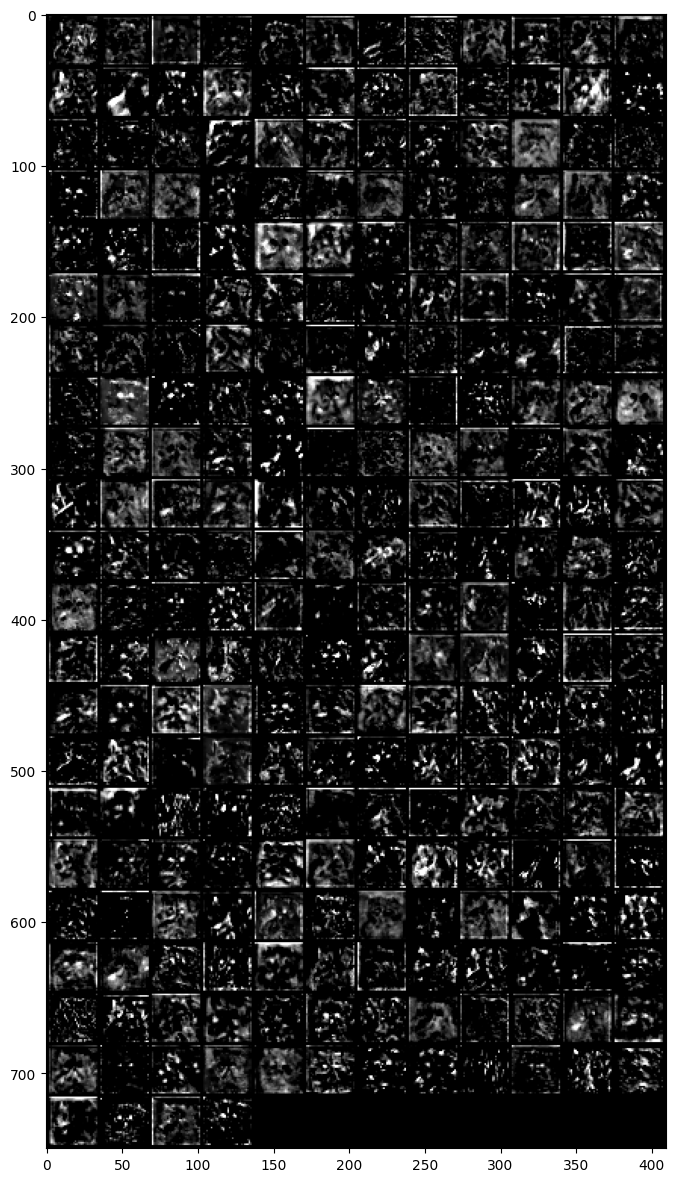

In [258]:
out = net2d[:4](X[[2]].to("cuda:0")).cpu().detach()
fig = plt.figure(figsize=(8, 16))
img_grid = torchvision.utils.make_grid(torch.einsum('ochw -> cohw', out), nrow=12)
plt.imshow(img_grid.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..16.748167].

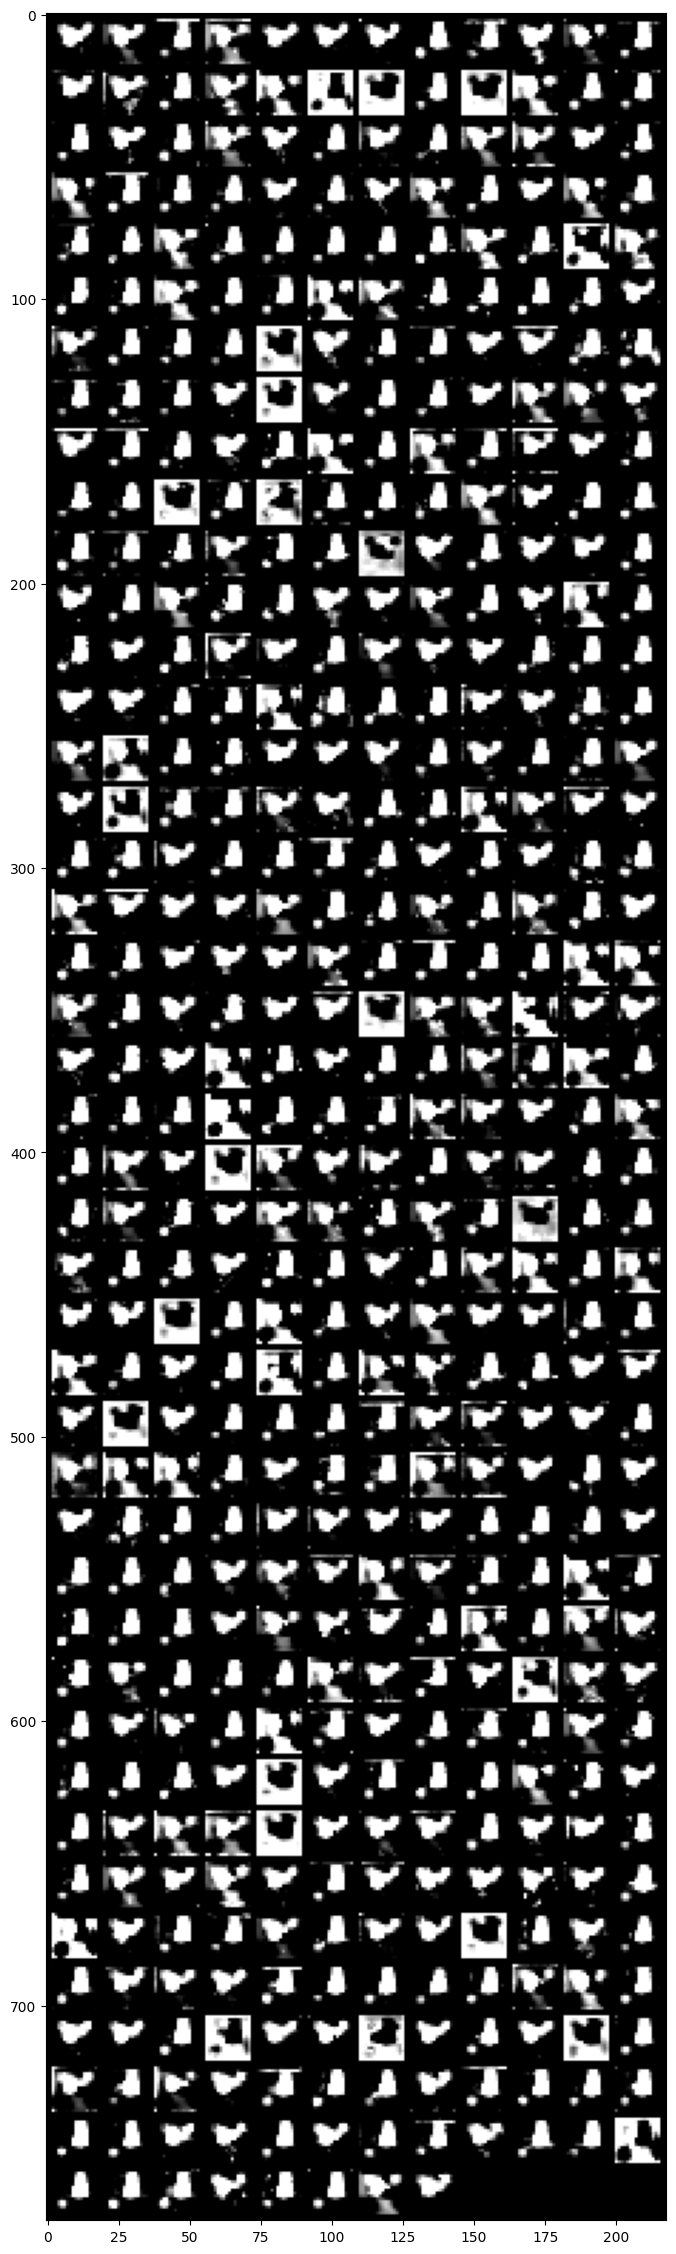

In [259]:
out = net2d[:5](X[[2]].to("cuda:0")).cpu().detach()
fig = plt.figure(figsize=(8, 32))
img_grid = torchvision.utils.make_grid(torch.einsum('ochw -> cohw', out), nrow=12)
plt.imshow(img_grid.permute(1, 2, 0))
plt.show()